# Práctica 12. Métodos de normalización de píxeles

<div class="alert alert-block alert-success">
<b>Resumen:</b>  Esta práctica presenta una introducción a la normalización de píxeles en el ámbito de la visión por computadora. Utilizando las librerías OpenCV, numpy y Matplotlib.
</div>

***

In [1]:
# Preámbulo
import cv2
import numpy as np
import matplotlib.pyplot as plt

***

### Lectura de imágenes

Se procede a leer las imágenes en escala de grises y a visualizarlas. Además, se calcula el rango de intensidades para cada imagen.

In [2]:
# Lectura de las imágenes en escala de grises
im_gray_1 = cv2.imread('./images/cameraman.tif')
im_gray_2 = cv2.imread('./images/circuit.tif')

In [3]:
def visulization(im_1, im_2):
    # Visualización de las imágenes
    fig, axes = plt.subplots(1, 2, figsize=(7, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(im_1, cmap='gray')
    plt.title('Imagen 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(im_2, cmap='gray')
    plt.title('Imagen 2')
    plt.axis('off')

    plt.show()

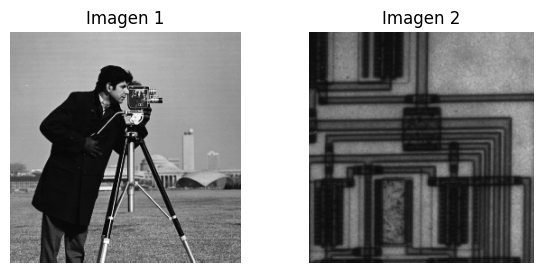

In [4]:
visulization(im_gray_1, im_gray_2)

Rango de intensidades

In [5]:
# Cálculo del rango de intensidades
def intensity_range(im_gray):
    l_max = im_gray.max()
    l_min = im_gray.min()

    print(f"Imagen: min = {l_min}, max = {l_max}")

In [6]:
# intensidades máximas y mínimas
intensity_range(im_gray_1)
intensity_range(im_gray_2)

Imagen: min = 7, max = 253
Imagen: min = 12, max = 191


***

### 1. Normalización min-max

Escala los valores de los píxeles a un rango específico, generalmente [0, 1] o [-1, 1].

$ X_{\text{norm}} = \dfrac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $

In [7]:
def min_max_normalization(image, new_min=0, new_max=1):
    # Convertir a float para evitar desbordamientos
    image_float = image.astype(np.float32)
    norm_image = (image_float - image_float.min()) / (image_float.max() - image_float.min())
    norm_image = norm_image * (new_max - new_min) + new_min
    return norm_image

In [8]:
min_max_norm_1 = min_max_normalization(im_gray_1)
min_max_norm_2 = min_max_normalization(im_gray_2)

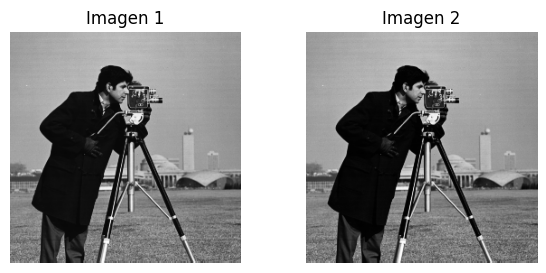

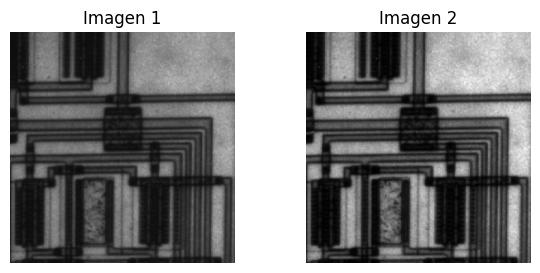

In [9]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, min_max_norm_1)
visulization(im_gray_2, min_max_norm_2)

***

### 2. Estandarización (Normalización z-score)

Ajusta los valores de los píxeles para que tengan una media de 0 y una desviación estándar de 1.

$X_{\text{est}} = \dfrac{X - \mu}{\sigma}$

donde:
- $\mu$ es la media de los valores de los píxeles.
- $\sigma$ es la desviación estándar de los valores de los píxeles.

In [ ]:
def z_score_normalization(image):
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    std = np.std(image_float)
    norm_image = (image_float - mean) / std
    # Para visualizar, escalar de nuevo al rango [0,1]
    norm_image = (norm_image - norm_image.min()) / (norm_image.max() - norm_image.min())
    return norm_image

In [ ]:
z_score_norm_1 = z_score_normalization(im_gray_1)
z_score_norm_2 = z_score_normalization(im_gray_2)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, z_score_norm_1)
visulization(im_gray_2, z_score_norm_2)

***

### 3. Normalización por media (Mean normalization)

Resta la media de los píxeles a cada valor de píxel.

$X_{\text{norm}} = X - \mu$

donde:
- $\mu$ es la media de los valores de los píxeles.

In [ ]:
def mean_normalization(image):
    image_float = image.astype(np.float32)
    mean = np.mean(image_float)
    norm_image = image_float - mean
    # Para visualizar, escalar de nuevo al rango [0,1]
    norm_image = (norm_image - norm_image.min()) / (norm_image.max() - norm_image.min())
    return norm_image

In [ ]:
mean_norm_1 = mean_normalization(im_gray_1)
mean_norm_2 = mean_normalization(im_gray_2)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, mean_norm_1)
visulization(im_gray_2, mean_norm_2)

***

### 4. Normalización de unidad (Unit vector normalization)

Escala los valores de los píxeles para que el vector de la imagen tenga una norma (longitud) de 1.

$X_{\text{unit}} = \dfrac{X}{\|X\|}$

donde:
- $\|X\|$ es la norma del vector de la imagen.
- $\|X\| = \sqrt{\sum_{i,j} abs(a_{i,j})^2}$

In [ ]:
def unit_vector_normalization(image):
    image_float = image.astype(np.float32)
    norm = np.linalg.norm(image_float)
    if norm == 0:
        return image_float
    norm_image = image_float / norm
    # Para visualizar, escalar al rango [0,1]
    norm_image = (norm_image - norm_image.min()) / (norm_image.max() - norm_image.min())
    return norm_image

In [ ]:
unit_norm_1 = unit_vector_normalization(im_gray_1)
unit_norm_2 = unit_vector_normalization(im_gray_2)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, unit_norm_1)
visulization(im_gray_2, unit_norm_2)

***

### 5. División por 255

Escala los valores de los píxeles de una imagen de 8 bits (0-255) al rango [0, 1].

$X_{\text{scaled}} = \dfrac{X}{255}$

In [ ]:
def division_by_255(image):
    image_float = image.astype(np.float32)
    norm_image = image_float / 255.0
    return norm_image

In [ ]:
div_255_1 = division_by_255(im_gray_1)
div_255_2 = division_by_255(im_gray_2)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, div_255_1)
visulization(im_gray_2, div_255_2)

***

### 6. Blanqueo (whitening)

Transforma los datos para que tengan una matriz de covarianza identidad, eliminando la correlación entre píxeles.

$\text{Whitened} = X \cdot \left( V \cdot \Lambda^{-\dfrac{1}{2}} \cdot V^T \right)$

Donde:

- $X$ es la matriz de datos de entrada.
- $V$ son los vectores propios de la matriz de covarianza (eigenvector).
- $\Lambda$ es la matriz diagonal de valores propios.

In [ ]:
def zca_whitening(image, epsilon=1e-5):
    # Convertir la imagen a formato (H*W, C)
    h, w, c = image.shape
    flat_image = image.reshape(-1, c).astype(np.float32)
    
    # Calcular la matriz de covarianza
    covariance = np.cov(flat_image, rowvar=False)
    
    # Descomposición en valores y vectores propios
    eig_vals, eig_vecs = np.linalg.eigh(covariance)
    
    # Filtrar valores pequeños
    eig_vals = np.maximum(eig_vals, epsilon)
    
    # Matriz de whitening
    whitening_matrix = eig_vecs @ np.diag(1.0 / np.sqrt(eig_vals)) @ eig_vecs.T
    
    # Aplicar whitening
    whitened = flat_image @ whitening_matrix
    
    # Revertir a la forma original
    whitened_image = whitened.reshape(h, w, c)
    
    # Normalizar para visualizar
    whitened_image = (whitened_image - whitened_image.min()) / (whitened_image.max() - whitened_image.min())
    
    return whitened_image

In [ ]:
zca_white_1 = zca_whitening(im_gray_1)
zca_white_2 = zca_whitening(im_gray_2)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, zca_white_1)
visulization(im_gray_2, zca_white_2)

***

### 7. Normalización de contraste local (local contrast normalization)

Normaliza cada píxel basándose en el contraste local alrededor de él.

$X_{\text{norm}}(i,j) = \dfrac{X(i,j) - \mu_{\text{local}}}{\sigma_{\text{local}} + \epsilon}$

Donde:

- $\mu_{\text{local}}$ es la media local alrededor del píxel $(i,j)$.
- $\sigma_{\text{local}}$ es la desviación estándar local alrededor del píxel $(i,j)$.
- $\epsilon$ es un pequeño valor para evitar divisiones por cero.

In [10]:
def local_contrast_normalization(image, kernel_size=15, epsilon=1e-8):
    image_float = image.astype(np.float32)
    # Convertir a escala de grises para calcular local mean y std
    gray = cv2.cvtColor(image_float, cv2.COLOR_RGB2GRAY)
    
    # Calcular media local
    local_mean = cv2.blur(gray, (kernel_size, kernel_size))
    
    # Calcular media de cuadrados
    local_mean_sq = cv2.blur(gray**2, (kernel_size, kernel_size))
    
    # Calcular varianza local
    local_var = local_mean_sq - local_mean**2
    local_std = np.sqrt(local_var + epsilon)
    
    # Expandir dimensiones para aplicar a los tres canales
    local_mean = cv2.blur(image_float, (kernel_size, kernel_size))
    local_std = cv2.blur(image_float**2, (kernel_size, kernel_size))
    local_std = np.sqrt(local_std - (local_mean**2) + epsilon)
    
    # Normalizar
    norm_image = (image_float - local_mean) / local_std
    
    # Normalizar para visualizar
    norm_image = (norm_image - norm_image.min()) / (norm_image.max() - norm_image.min())
    
    return norm_image

In [11]:
local_contrast_norm_1 = local_contrast_normalization(im_gray_1)
local_contrast_norm_2 = local_contrast_normalization(im_gray_2)

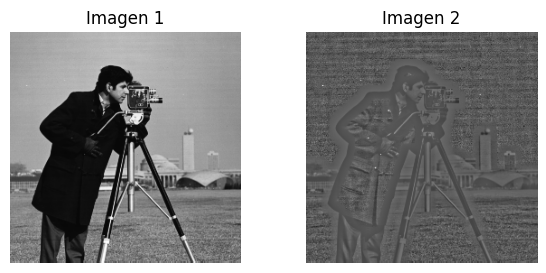

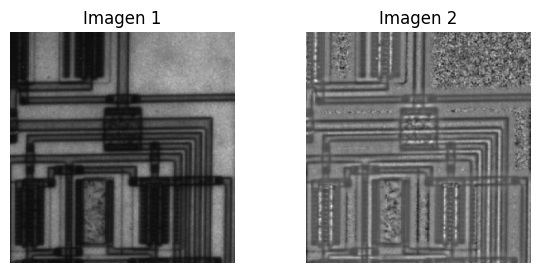

In [12]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, local_contrast_norm_1)
visulization(im_gray_2, local_contrast_norm_2)

***

### 8. Normalización robusta (Robust scaling)

Escala los datos utilizando estadísticos robustos como la mediana y el rango intercuartílico (IQR).

$X_{\text{robust}} = \dfrac{X - \text{Mediana}}{\text{IQR}}$

donde:
- Mediana es el valor central de los píxeles.
- IQR es el rango intercuartílico $(Q3 - Q1)$.

In [17]:
def robust_scaling(image):
    image_float = image.astype(np.float32)
    # Calcular mediana y percentiles
    median = np.median(image_float, axis=(0,1), keepdims=True)
    q75, q25 = np.percentile(image_float, [75 ,25], axis=(0,1), keepdims=True)
    iqr = q75 - q25
    # Evitar división por cero
    iqr[iqr == 0] = 1
    norm_image = (image_float - median) / iqr
    # Normalizar para visualizar
    norm_image = (norm_image - norm_image.min()) / (norm_image.max() - norm_image.min())
    return norm_image

In [18]:
robust_norm_1 = robust_scaling(im_gray_1)
robust_norm_2 = robust_scaling(im_gray_2)

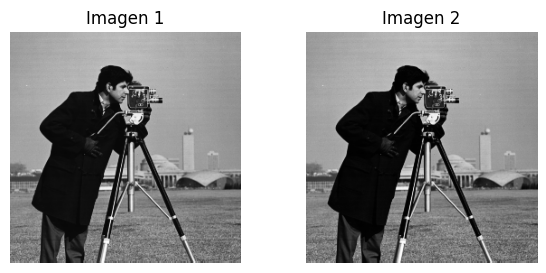

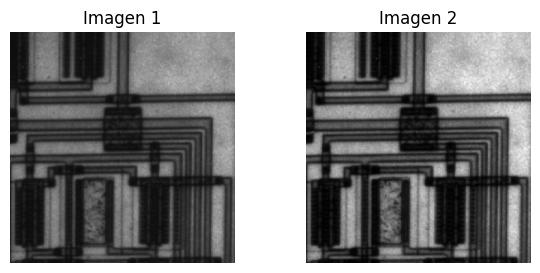

In [19]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, robust_norm_1)
visulization(im_gray_2, robust_norm_2)

***

### 9. Transformación logarítmica

Aplica una función logarítmica a los valores de los píxeles para reducir la variabilidad y comprimir el rango dinámico.

$X_{\text{log}} = \log(1 + X)$

In [13]:
def log_transformation(image):
    image_float = image.astype(np.float32)
    # Añadir 1 para evitar log(0)
    log_image = np.log1p(image_float)
    # Normalizar para visualizar
    log_image = (log_image - log_image.min()) / (log_image.max() - log_image.min())
    return log_image

In [21]:
log_norm_1 = log_transformation(im_gray_1)
log_norm_2 = log_transformation(im_gray_2)

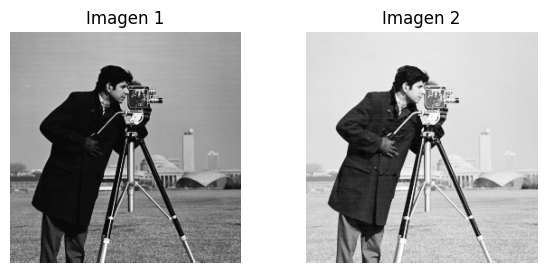

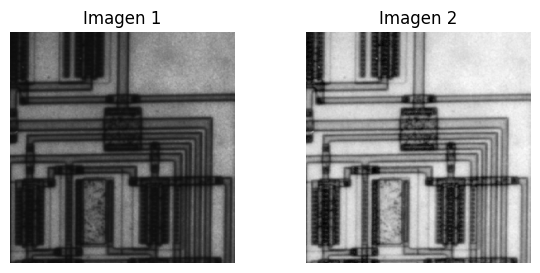

In [22]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, log_norm_1)
visulization(im_gray_2, log_norm_2)

***

### 10. Transformación de potencia (power transformation)

Aplica funciones como la raíz cuadrada o cúbica para estabilizar la varianza y hacer que los datos se asemejen más a una distribución normal.

$X_{\text{trans}} = X^{\gamma}$

donde:

- Raíz Cuadrada: $\gamma = 0.5$
- Raíz Cúbica: $\gamma = 1/3$

In [ ]:
def power_transformation(image, power=0.5):
    image_float = image.astype(np.float32)
    # Aplicar la transformación de potencia
    transformed = np.power(image_float, power)
    # Normalizar para visualizar
    transformed = (transformed - transformed.min()) / (transformed.max() - transformed.min())
    return transformed

In [ ]:
# Raíz Cuadrada
sqrt_norm_1_05 = power_transformation(im_gray_1, power=0.5)

# Raíz Cúbica
cbrt_norm_1_3 = power_transformation(im_gray_1, power=1/3)

In [ ]:
# Mostrar la imagen original y normalizada
visulization(im_gray_1, sqrt_norm_1_05)
visulization(im_gray_1, cbrt_norm_1_3)

***

Cada método tiene sus propias ventajas y se utiliza según las necesidades específicas del proyecto de visión por computadora. La normalización adecuada de los píxeles es fundamental para mejorar el rendimiento y la estabilidad de los modelos de aprendizaje automático.